In [6]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
import os
import glob
import cmocean
from salishsea_tools import viz_tools, places, visualisations

%matplotlib inline

In [7]:
x=np.arange(0,10) #create a numpy array containing the numbers 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print('x:',x)
y=x[4:8] # put the 4-indexed (4) through 7-indexed (7) elements in y
print('y:',y)
print('last element:',x[-1])
print('all of x:',x[:])

x: [0 1 2 3 4 5 6 7 8 9]
y: [4 5 6 7]
last element: 9
all of x: [0 1 2 3 4 5 6 7 8 9]


In [8]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

## Load a file from the 201812 hindcast

In [60]:
f=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1h_20150501_20150501_ptrc_T.nc')

In [21]:
print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [61]:
fe3t=nc.Dataset('/results/SalishSea/nowcast-green.201812/01may15/SalishSea_1h_20150501_20150501_carp_T.nc')

In [23]:
print(fe3t.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])


In [24]:
fe3t.variables['time_centered']

<class 'netCDF4._netCDF4.Variable'>
float64 time_centered(time_counter)
    standard_name: time
    long_name: Time axis
    calendar: gregorian
    units: seconds since 1900-01-01 00:00:00
    time_origin: 1900-01-01 00:00:00
    bounds: time_centered_bounds
unlimited dimensions: time_counter
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [25]:
#return times as datetime objects:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')

In [26]:
torig

datetime.datetime(1900, 1, 1, 0, 0)

In [27]:
f.variables['time_centered'][:]

masked_array(data=[3.6368370e+09, 3.6368406e+09, 3.6368442e+09,
                   3.6368478e+09, 3.6368514e+09, 3.6368550e+09,
                   3.6368586e+09, 3.6368622e+09, 3.6368658e+09,
                   3.6368694e+09, 3.6368730e+09, 3.6368766e+09,
                   3.6368802e+09, 3.6368838e+09, 3.6368874e+09,
                   3.6368910e+09, 3.6368946e+09, 3.6368982e+09,
                   3.6369018e+09, 3.6369054e+09, 3.6369090e+09,
                   3.6369126e+09, 3.6369162e+09, 3.6369198e+09],
             mask=False,
       fill_value=1e+20)

In [28]:
times=np.array([torig+dt.timedelta(seconds=ii) for ii in \
               f.variables['time_centered'][:]])

In [29]:
times

array([datetime.datetime(2015, 4, 1, 0, 30),
       datetime.datetime(2015, 4, 1, 1, 30),
       datetime.datetime(2015, 4, 1, 2, 30),
       datetime.datetime(2015, 4, 1, 3, 30),
       datetime.datetime(2015, 4, 1, 4, 30),
       datetime.datetime(2015, 4, 1, 5, 30),
       datetime.datetime(2015, 4, 1, 6, 30),
       datetime.datetime(2015, 4, 1, 7, 30),
       datetime.datetime(2015, 4, 1, 8, 30),
       datetime.datetime(2015, 4, 1, 9, 30),
       datetime.datetime(2015, 4, 1, 10, 30),
       datetime.datetime(2015, 4, 1, 11, 30),
       datetime.datetime(2015, 4, 1, 12, 30),
       datetime.datetime(2015, 4, 1, 13, 30),
       datetime.datetime(2015, 4, 1, 14, 30),
       datetime.datetime(2015, 4, 1, 15, 30),
       datetime.datetime(2015, 4, 1, 16, 30),
       datetime.datetime(2015, 4, 1, 17, 30),
       datetime.datetime(2015, 4, 1, 18, 30),
       datetime.datetime(2015, 4, 1, 19, 30),
       datetime.datetime(2015, 4, 1, 20, 30),
       datetime.datetime(2015, 4, 1, 21, 30)

In [30]:
# load model mesh
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Depth Profile

Text(0.5, 0, 'Concentration ($\\mu$M)')

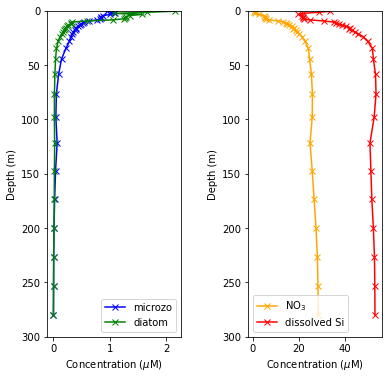

In [62]:
fig,ax=plt.subplots(1,2,figsize=(6,6))
fig.subplots_adjust(wspace=.5) #spaces out axes more
il=12
#use location 'S3'
ij,ii=places.PLACES['S3']['NEMO grid ji']
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,
                             f.variables['microzooplankton'][il,:,ij,ii]),
          f.variables['deptht'][:],'b-x',label='microzo')
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['diatoms'][il,:,ij,ii]),f.variables['deptht'][:],'g-x',label='diatom')
ax[0].set_ylim(300,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['nitrate'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='orange',label='NO$_3$')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['silicon'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='r',label='dissolved Si')
ax[1].set_ylim(300,0)
ax[1].set_ylabel('Depth (m)')
ax[1].legend()
ax[1].set_xlabel('Concentration ($\mu$M)')

Text(0.5, 0, 'Concentration ($\\mu$M)')

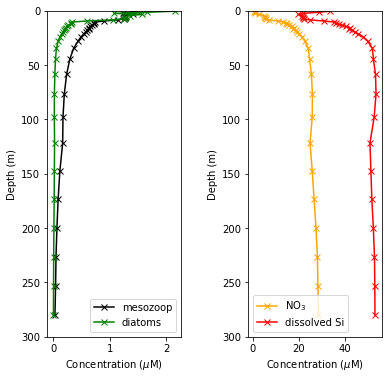

In [63]:
fig,ax=plt.subplots(1,2,figsize=(6,6))
fig.subplots_adjust(wspace=.5) # space the axes out more
il=12 # hour
# use location 'S3':
ij,ii=places.PLACES['S3']['NEMO grid ji']
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['mesozooplankton'][il,:,ij,ii]),f.variables['deptht'][:],'k-x',label='mesozoop')
ax[0].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['diatoms'][il,:,ij,ii]),f.variables['deptht'][:],'g-x',label='diatoms')
ax[0].set_ylim(300,0)
ax[0].legend()
ax[0].set_xlabel('Concentration ($\mu$M)')
ax[0].set_ylabel('Depth (m)')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['nitrate'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='orange',label='NO$_3$')
ax[1].plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['silicon'][il,:,ij,ii]),f.variables['deptht'][:],'-x',color='r',label='dissolved Si')
ax[1].set_ylim(300,0)
ax[1].set_ylabel('Depth (m)')
ax[1].legend()
ax[1].set_xlabel('Concentration ($\mu$M)')

/home/ksuchy/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
<ipython-input-33-1d192f8c9cd6>:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


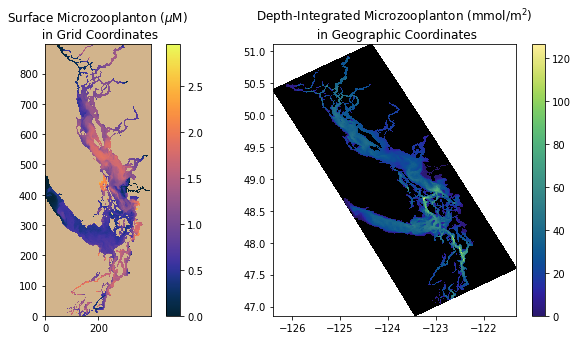

In [33]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['microzooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Microzooplanton (mmol/m$^2$) \n in Geographic Coordinates');
fig.colorbar(m1,ax=ax[1])

<ipython-input-34-c7efb61f798b>:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')


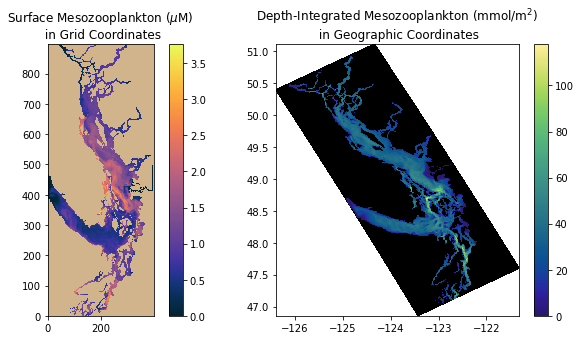

In [34]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('tan')
cmap1=cmocean.cm.haline
cmap1.set_bad('k')
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['mesozooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Mesozooplankton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['mesozooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:],0)
m1=ax[1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,shading='nearest')
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Mesozooplankton (mmol/m$^2$) \n in Geographic Coordinates');
fig.colorbar(m1,ax=ax[1])

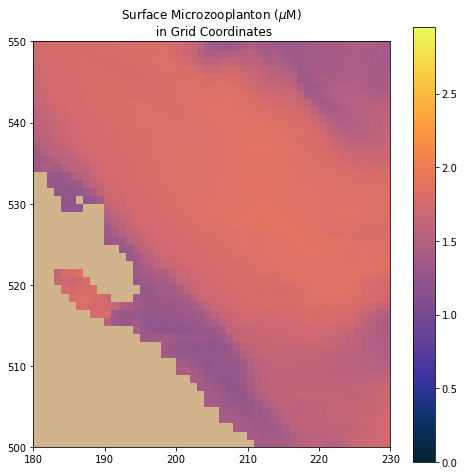

In [35]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap1=cmocean.cm.haline
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

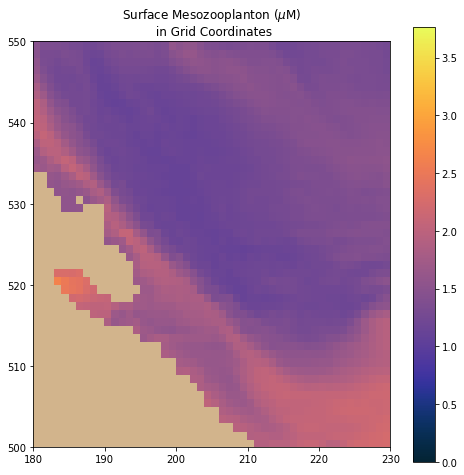

In [36]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap1=cmocean.cm.haline
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['mesozooplankton'][il,0,:,:]),cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Mesozooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

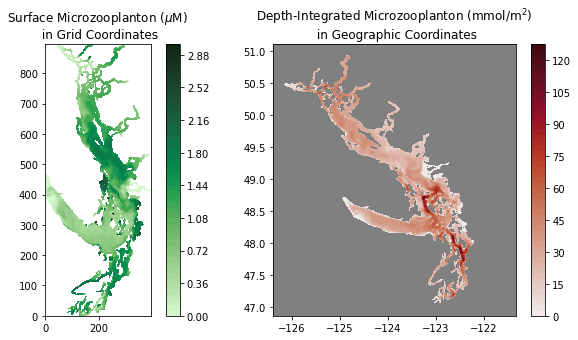

In [37]:
# with contourf: smoothing, but creates a smaller file
cmap0=cmocean.cm.algae
cmap1=cmocean.cm.amp
cmap1.set_bad('k') # does nothing here
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['microzooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:],0)
m1=ax[1].contourf(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,levels=50)
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Microzooplanton (mmol/m$^2$) \n in Geographic Coordinates');
ax[1].set_facecolor('gray')
fig.colorbar(m1,ax=ax[1])

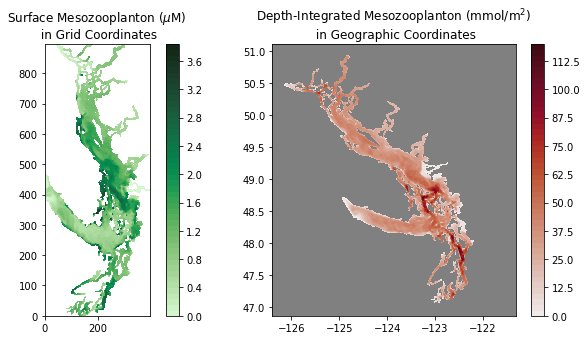

In [38]:
# with contourf: smoothing, but creates a smaller file
cmap0=cmocean.cm.algae
cmap1=cmocean.cm.amp
cmap1.set_bad('k') # does nothing here
il=5
fig,ax=plt.subplots(1,2,figsize=(12,5))
m0=ax[0].contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['mesozooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax[0],coords='grid')
ax[0].set_title('Surface Mesozooplanton ($\mu$M) \n in Grid Coordinates')
fig.colorbar(m0,ax=ax[0])
# vertical sum of microzo in mmol/m3 * vertical grid thickness in m:
intuz=np.sum(f.variables['mesozooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:],0)
m1=ax[1].contourf(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,intuz),cmap=cmap1,levels=50)
viz_tools.set_aspect(ax[0],coords='map')
ax[1].set_title('Depth-Integrated Mesozooplanton (mmol/m$^2$) \n in Geographic Coordinates');
ax[1].set_facecolor('gray')
fig.colorbar(m1,ax=ax[1])

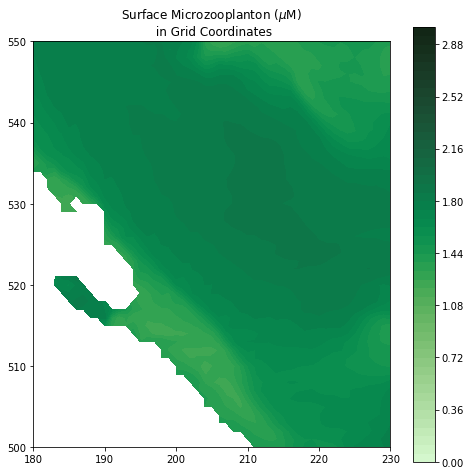

In [39]:
# with contourf: smoothing, but creates a smaller file
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['microzooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Microzooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

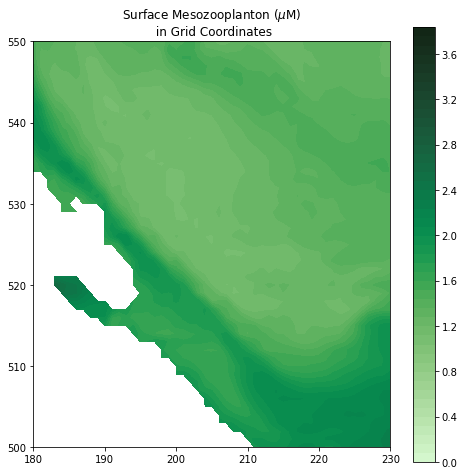

In [40]:
# with contourf: smoothing, but creates a smaller file
il=5
fig,ax=plt.subplots(1,1,figsize=(8,8))
m0=ax.contourf(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['mesozooplankton'][il,0,:,:]),levels=50,cmap=cmap0)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Surface Mesozooplanton ($\mu$M) \n in Grid Coordinates')
ax.set_ylim(500,550)
ax.set_xlim(180,230)
fig.colorbar(m0)

In [41]:
#open bathy file and meshmask
fbathy=nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/mesh_mask201702.nc')

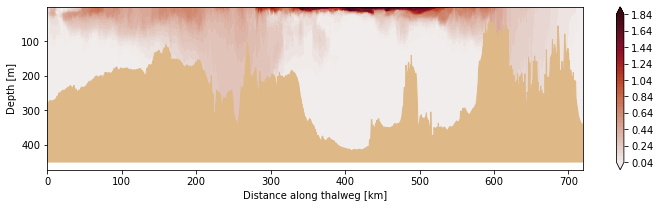

In [42]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f.variables['microzooplankton'][il,...],fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)

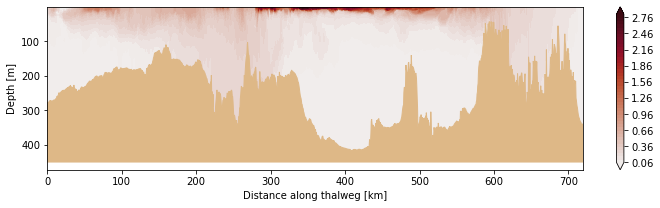

In [43]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f.variables['mesozooplankton'][il,...],fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)

In [44]:
fbathy.close()
fmesh.close()

In [45]:
f.close()
fe3t.close()